In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothicOTF'
print(plt.rcParams['font.family'])

['NanumGothicOTF']


In [2]:
# from matplotlib import font_manager, rc

# font_path = "C:\\Users\\tj\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.otf"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

In [3]:
import pandas as pd
df = pd.read_csv('data/전처리/전처리_지하철_요일_고유역번호_승하차차이_위도경도0717.csv', index_col=0)

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
result = df.copy()
result_diff = result[result['승하차구분'] == '승하차 차이']

group_diff = result_diff.groupby(['호선','역명','고유역번호(외부역코드)'], as_index=False)[['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후','총 이용인원']].sum()
group_diff

,호선,역명,고유역번호(외부역코드),06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원
0,1호선,동대문,155,113261.0,26768.0,26547.0,-28786.0,-47572.0,-66362.0,-86091.0,...,78802.0,73501.0,42765.0,-25291.0,12341.0,20580.0,2997.0,-46609.0,-20630.0,151297.0
1,1호선,동묘앞,159,23388.0,-14617.0,-29326.0,-114699.0,-98605.0,-124470.0,-148233.0,...,184196.0,198052.0,118851.0,25669.0,4909.0,-3736.0,-27953.0,-31192.0,-20168.0,-130353.0
2,1호선,서울역,150,7663.0,-427924.0,-763452.0,-1717988.0,-1065395.0,-225156.0,49613.0,...,361424.0,818915.0,1360735.0,531961.0,391231.0,497329.0,315992.0,107583.0,-9669.0,539506.0
3,1호선,시청,151,-26127.0,-235838.0,-705013.0,-2147146.0,-916306.0,-334523.0,-247265.0,...,341844.0,716866.0,1573974.0,559213.0,512082.0,477399.0,305071.0,79295.0,-3552.0,-93761.0
4,1호선,신설동,156,79422.0,58.0,-39446.0,-322325.0,-158521.0,-57362.0,1906.0,...,111146.0,182812.0,271606.0,872.0,8457.0,-4719.0,-29119.0,-58711.0,-17903.0,148729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,8호선,신흥,2825,37171.0,43344.0,128477.0,141160.0,68305.0,24845.0,17682.0,...,-18848.0,-37570.0,-114641.0,-119202.0,-57990.0,-57901.0,-56857.0,-40524.0,-11871.0,-100447.0
273,8호선,암사,2811,164193.0,280390.0,855554.0,1025821.0,451618.0,205363.0,131109.0,...,-128411.0,-252050.0,-562538.0,-539967.0,-272307.0,-230710.0,-283184.0,-169217.0,-49779.0,740022.0
274,8호선,잠실(송파구청),2815,-11876.0,-70454.0,-270394.0,-784816.0,-430249.0,-270970.0,-254722.0,...,52270.0,124351.0,281959.0,206157.0,294036.0,335932.0,247715.0,61811.0,1136.0,-934935.0
275,8호선,장지,2820,35356.0,68645.0,222131.0,117571.0,22913.0,22119.0,-11175.0,...,38764.0,133621.0,-37306.0,-121650.0,18439.0,4690.0,-81800.0,-67389.0,-18916.0,319917.0


In [6]:
group_diff['역명'].unique()

array(['동대문', '동묘앞', '서울역', '시청', '신설동', '제기동', '종각', '종로3가', '종로5가',
       '청량리(서울시립대입구)', '강남', '강변(동서울터미널)', '건대입구', '교대(법원.검찰청)',
       '구로디지털단지', '구의(광진구청)', '낙성대(강감찬)', '당산', '대림(구로구청)', '도림천',
       '동대문역사문화공원(DDP)', '뚝섬', '문래', '방배', '봉천', '사당', '삼성(무역센터)', '상왕십리',
       '서울대입구(관악구청)', '서초', '선릉', '성수', '신답', '신당', '신대방', '신도림', '신림',
       '신정네거리', '신촌', '아현', '양천구청', '역삼', '영등포구청', '왕십리(성동구청)', '용답',
       '용두(동대문구청)', '을지로3가', '을지로4가', '을지로입구', '이대', '잠실(송파구청)', '잠실나루',
       '잠실새내', '종합운동장', '충정로(경기대입구)', '한양대', '합정', '홍대입구', '가락시장',
       '경복궁(정부서울청사)', '경찰병원', '고속터미널', '구파발', '금호', '남부터미널(예술의전당)', '녹번',
       '대청', '대치', '도곡', '독립문', '동대입구', '매봉', '무악재', '불광', '수서', '신사',
       '안국', '압구정', '약수', '양재(서초구청)', '연신내', '오금', '옥수', '일원', '잠원', '지축',
       '충무로', '학여울', '홍제', '길음', '남태령', '노원', '당고개', '동작(현충원)', '명동',
       '미아(서울사이버대학)', '미아사거리', '삼각지', '상계', '성신여대입구(돈암)', '수유(강북구청)',
       '숙대입구(갈월)', '신용산', '쌍문', '이촌(국립중앙박물관)', '창동', '총신대입구(이수)',
       '한성대입구(삼

In [7]:
group_diff = group_diff.set_index('역명')
group_diff

,호선,고유역번호(외부역코드),06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원
역명,,,,,,,,,,,,,,,,,,,,,
동대문,1호선,155,113261.0,26768.0,26547.0,-28786.0,-47572.0,-66362.0,-86091.0,-34895.0,...,78802.0,73501.0,42765.0,-25291.0,12341.0,20580.0,2997.0,-46609.0,-20630.0,151297.0
동묘앞,1호선,159,23388.0,-14617.0,-29326.0,-114699.0,-98605.0,-124470.0,-148233.0,-99737.0,...,184196.0,198052.0,118851.0,25669.0,4909.0,-3736.0,-27953.0,-31192.0,-20168.0,-130353.0
서울역,1호선,150,7663.0,-427924.0,-763452.0,-1717988.0,-1065395.0,-225156.0,49613.0,46232.0,...,361424.0,818915.0,1360735.0,531961.0,391231.0,497329.0,315992.0,107583.0,-9669.0,539506.0
시청,1호선,151,-26127.0,-235838.0,-705013.0,-2147146.0,-916306.0,-334523.0,-247265.0,-191516.0,...,341844.0,716866.0,1573974.0,559213.0,512082.0,477399.0,305071.0,79295.0,-3552.0,-93761.0
신설동,1호선,156,79422.0,58.0,-39446.0,-322325.0,-158521.0,-57362.0,1906.0,27415.0,...,111146.0,182812.0,271606.0,872.0,8457.0,-4719.0,-29119.0,-58711.0,-17903.0,148729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
신흥,8호선,2825,37171.0,43344.0,128477.0,141160.0,68305.0,24845.0,17682.0,6008.0,...,-18848.0,-37570.0,-114641.0,-119202.0,-57990.0,-57901.0,-56857.0,-40524.0,-11871.0,-100447.0
암사,8호선,2811,164193.0,280390.0,855554.0,1025821.0,451618.0,205363.0,131109.0,109377.0,...,-128411.0,-252050.0,-562538.0,-539967.0,-272307.0,-230710.0,-283184.0,-169217.0,-49779.0,740022.0
잠실(송파구청),8호선,2815,-11876.0,-70454.0,-270394.0,-784816.0,-430249.0,-270970.0,-254722.0,-204223.0,...,52270.0,124351.0,281959.0,206157.0,294036.0,335932.0,247715.0,61811.0,1136.0,-934935.0


In [8]:
data = group_diff.T
data = data.reset_index()
data2 = data.drop([0, 1, 22], axis=0)
data2.rename(columns={'index': '시간'}, inplace=True)
data2

역명,시간,동대문,동묘앞,서울역,시청,신설동,제기동,종각,종로3가,종로5가,...,복정,산성,석촌,송파,수진,신흥,암사,잠실(송파구청),장지,천호(풍납토성)
2,06시이전,113261.0,23388.0,7663.0,-26127.0,79422.0,40456.0,-9755.0,10359.0,-21986.0,...,23046.0,39709.0,26103.0,29225.0,42157.0,37171.0,164193.0,-11876.0,35356.0,104845.0
3,06-07시간대,26768.0,-14617.0,-427924.0,-235838.0,58.0,-3921.0,-237100.0,-113221.0,-145308.0,...,16805.0,47701.0,29510.0,36376.0,48830.0,43344.0,280390.0,-70454.0,68645.0,66593.0
4,07-08시간대,26547.0,-29326.0,-763452.0,-705013.0,-39446.0,32977.0,-1118207.0,-241039.0,-422673.0,...,204264.0,221438.0,87206.0,221237.0,144824.0,128477.0,855554.0,-270394.0,222131.0,312215.0
5,08-09시간대,-28786.0,-114699.0,-1717988.0,-2147146.0,-322325.0,-79975.0,-2842146.0,-730798.0,-1042918.0,...,224511.0,205083.0,31015.0,196022.0,139439.0,141160.0,1025821.0,-784816.0,117571.0,335880.0
6,09-10시간대,-47572.0,-98605.0,-1065395.0,-916306.0,-158521.0,-115107.0,-1545143.0,-637506.0,-587958.0,...,114489.0,91049.0,-52916.0,112410.0,72227.0,68305.0,451618.0,-430249.0,22913.0,105209.0
7,10-11시간대,-66362.0,-124470.0,-225156.0,-334523.0,-57362.0,-148279.0,-526515.0,-463471.0,-411737.0,...,56467.0,44841.0,-30165.0,74938.0,37220.0,24845.0,205363.0,-270970.0,22119.0,10141.0
8,11-12시간대,-86091.0,-148233.0,49613.0,-247265.0,1906.0,-131664.0,-380326.0,-423802.0,-328921.0,...,45589.0,37016.0,-32334.0,61178.0,26655.0,17682.0,131109.0,-254722.0,-11175.0,-2812.0
9,12-13시간대,-34895.0,-99737.0,46232.0,-191516.0,27415.0,-115108.0,-221994.0,-304356.0,-191925.0,...,38087.0,36203.0,-28374.0,45724.0,32823.0,6008.0,109377.0,-204223.0,-21302.0,-4937.0
10,13-14시간대,10467.0,-69292.0,60425.0,-124994.0,41261.0,-113577.0,-100893.0,-168955.0,-43433.0,...,33989.0,23567.0,-42147.0,23919.0,8090.0,-16953.0,70553.0,-165555.0,16109.0,-23664.0
11,14-15시간대,38901.0,9773.0,-5036.0,44123.0,49783.0,-19628.0,106111.0,27636.0,89666.0,...,28489.0,11701.0,-34524.0,-2262.0,-6507.0,-17066.0,8188.0,-81440.0,-11488.0,-50581.0


In [9]:
stations_10 = data2[['시간','잠실(송파구청)', '강남', '고속터미널', '서울역', '홍대입구', '선릉', '신림', '가산디지털단지', '사당', '구로디지털단지']]
stations_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2 to 21
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시간        20 non-null     object
 1   잠실(송파구청)  20 non-null     object
 2   잠실(송파구청)  20 non-null     object
 3   강남        20 non-null     object
 4   고속터미널     20 non-null     object
 5   고속터미널     20 non-null     object
 6   서울역       20 non-null     object
 7   서울역       20 non-null     object
 8   홍대입구      20 non-null     object
 9   선릉        20 non-null     object
 10  신림        20 non-null     object
 11  가산디지털단지   20 non-null     object
 12  사당        20 non-null     object
 13  사당        20 non-null     object
 14  구로디지털단지   20 non-null     object
dtypes: object(15)
memory usage: 2.5+ KB


In [10]:
import numpy as np
import seaborn as sns

In [11]:
import matplotlib

In [12]:
stations_10.head()

역명,시간,잠실(송파구청),잠실(송파구청),강남,고속터미널,고속터미널,서울역,서울역,홍대입구,선릉,신림,가산디지털단지,사당,사당,구로디지털단지
2,06시이전,88421.0,-11876.0,-10013.0,12593.0,-18858.0,7663.0,44342.0,297136.0,-14802.0,407980.0,17396.0,97789.0,106071.0,381767.0
3,06-07시간대,152960.0,-70454.0,-388045.0,-327408.0,-219475.0,-427924.0,-115920.0,156930.0,-356301.0,625861.0,-224347.0,-84569.0,89578.0,384529.0
4,07-08시간대,470878.0,-270394.0,-1290858.0,-287537.0,-295348.0,-763452.0,-312597.0,289541.0,-1089202.0,1917345.0,-1184887.0,312651.0,532062.0,658870.0
5,08-09시간대,-195590.0,-784816.0,-2819909.0,-389550.0,-386313.0,-1717988.0,-784832.0,-281373.0,-2972679.0,2796628.0,-4162646.0,364922.0,582196.0,-648930.0
6,09-10시간대,-552021.0,-430249.0,-3061662.0,-525455.0,-155091.0,-1065395.0,-456545.0,-845748.0,-2289829.0,1502768.0,-2277554.0,293778.0,472356.0,-375597.0


In [13]:
# 데이터프레임 구조 변경
stations_10 = stations_10.melt(id_vars='시간', var_name='역명', value_name='이용인원')

In [14]:
stations_10

,시간,역명,이용인원
0,06시이전,잠실(송파구청),88421.0
1,06-07시간대,잠실(송파구청),152960.0
2,07-08시간대,잠실(송파구청),470878.0
3,08-09시간대,잠실(송파구청),-195590.0
4,09-10시간대,잠실(송파구청),-552021.0
...,...,...,...
275,20-21시간대,구로디지털단지,-223177.0
276,21-22시간대,구로디지털단지,-344052.0
277,22-23시간대,구로디지털단지,-457609.0
278,23-24시간대,구로디지털단지,-365151.0


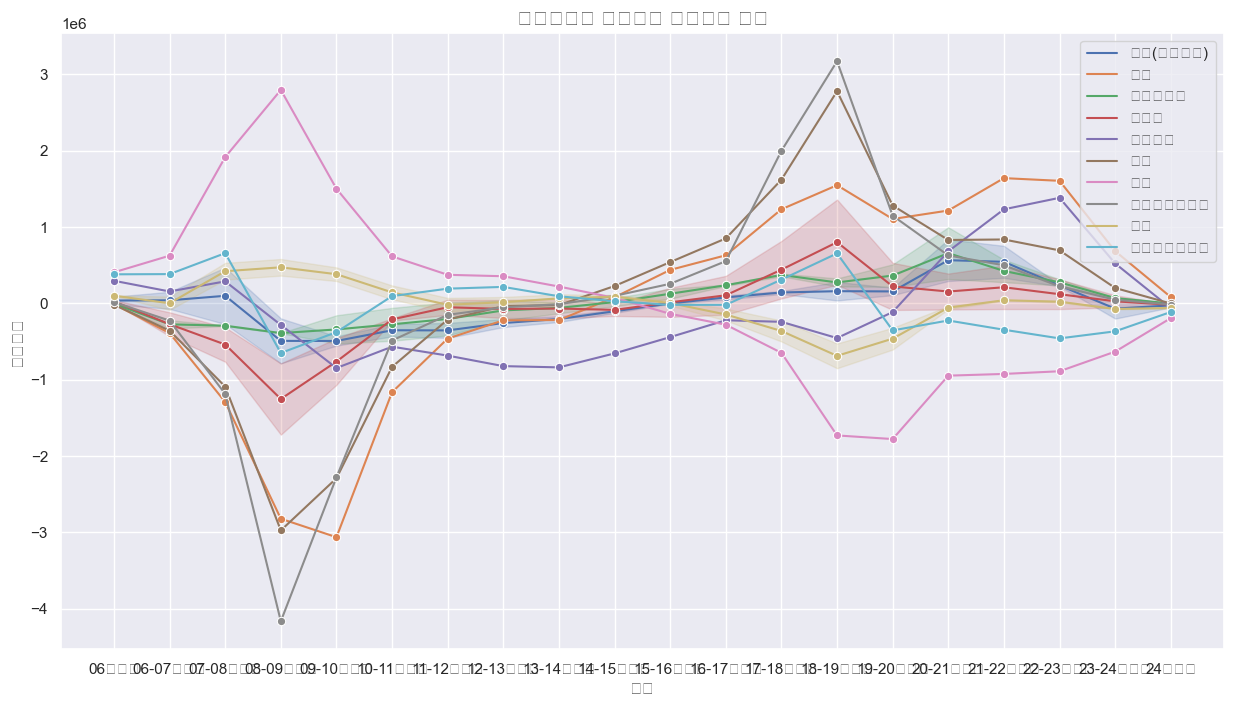

In [15]:
# 그래프 스타일 설정
sns.set_theme(style="darkgrid")

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 선 그래프 그리기
sns.lineplot(data=stations_10, x='시간', y='이용인원', hue='역명', marker='o')

# 라벨, 제목 등 설정
plt.legend(loc='upper right')
plt.xlabel('시간', fontsize=12)
plt.ylabel('이용인원', fontsize=12)
plt.title('지하철역별 시간대별 이용인원 추이', fontsize=15)

# 그래프 보여주기
plt.show()

https://seaborn.pydata.org/examples/errorband_lineplots.html

In [16]:
import matplotlib.font_manager as fm

# installed fonts
fonts = set([f.name for f in fm.fontManager.ttflist])

# check if 'NanumGothic' is in the list
print('NanumGothic' in fonts)


True
